In [4]:
from google.colab import files

uploading the file

In [8]:
uploaded = files.upload()

Saving Loan Prediction.csv to Loan Prediction.csv


In [9]:
import pandas as pd

Loading the file

In [10]:
loan_prediction = pd.read_csv('Loan Prediction.csv')

Checking total missing values

In [ ]:
print(loan_prediction.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


**Handling Missing Values**

Adding 'Mode' values for string datatype columns into their missing values' place
And
Adding 'Median' value to the numeric datatype column into their missing values' place

In [11]:
loan_prediction['Gender'].fillna(loan_prediction['Gender'].mode()[0], inplace = True)
loan_prediction['Dependents'].fillna(loan_prediction['Dependents'].mode()[0], inplace = True)
loan_prediction['Self_Employed'].fillna(loan_prediction['Self_Employed'].mode()[0], inplace = True)
loan_prediction['LoanAmount'].fillna(loan_prediction['LoanAmount'].mode()[0], inplace = True)
loan_prediction['Loan_Amount_Term'].fillna(loan_prediction['Loan_Amount_Term'].mode()[0], inplace = True)
loan_prediction['Credit_History'].fillna(loan_prediction['Credit_History'].mode()[0], inplace = True)

<ipython-input-11-2686400223>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_prediction['Gender'].fillna(loan_prediction['Gender'].mode()[0], inplace = True)
<ipython-input-11-2686400223>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

Creating a Histogram to represent, **`LoanAmounnt by Gender`**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

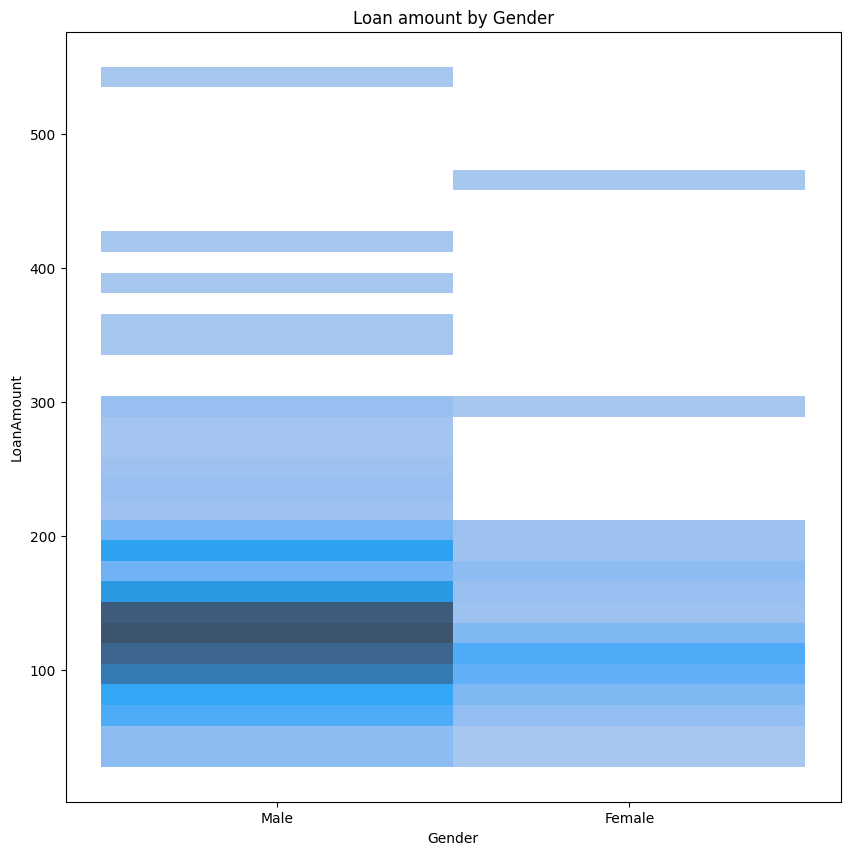

In [13]:
plt.figure(figsize = (10, 10))
sns.histplot(data = loan_prediction, y = 'LoanAmount', x = 'Gender')
plt.title('Loan amount by Gender')
plt.show()

Creating a Bar chart to represent **`Education by Gender`**

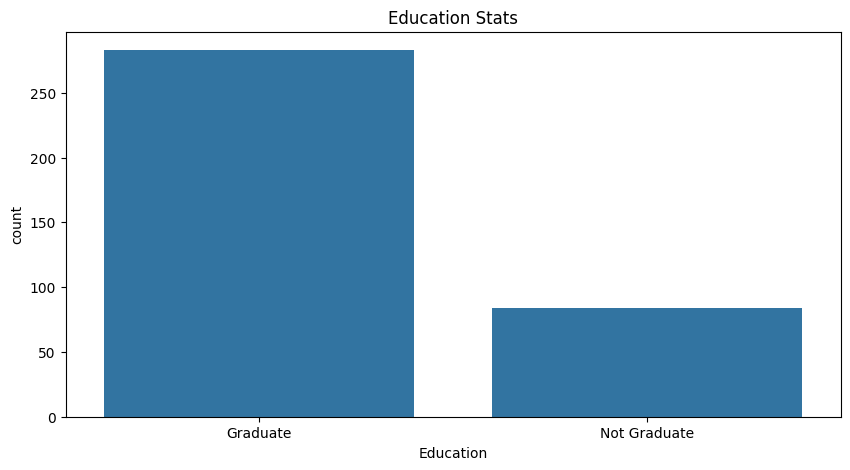

In [14]:
plt.figure(figsize = (10, 5))
sns.countplot(data = loan_prediction, x = 'Education')
plt.title('Education Stats')
plt.show()

Creating a new Metric '**Total Income**', which is sum of ApplicantIncome and CoapplicantIncome

In [15]:
loan_prediction['TotalIncome'] = loan_prediction['ApplicantIncome'] + loan_prediction['CoapplicantIncome']

Creating a Histogram to represent **`Total Income (Applicant Income + Coapplicant Income) by Education`**

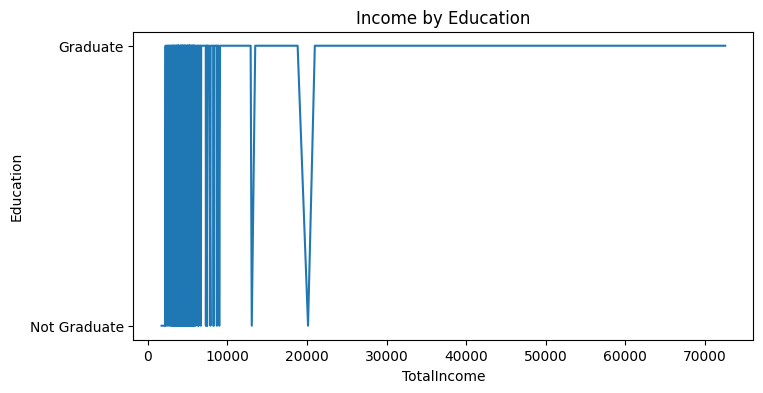

In [16]:
plt.figure(figsize = (8, 4))
sns.lineplot(data = loan_prediction, x = 'TotalIncome', y = 'Education')
plt.title('Income by Education')
plt.show()

**Moving Towards Training Classification Models**

Encoding Categorical Variables

In [17]:
loan_prediction_encoded = pd.get_dummies(loan_prediction, drop_first=True)

splitting data into features and target

In [18]:
y = loan_prediction_encoded[['LoanAmount']]
X = loan_prediction_encoded.drop(['LoanAmount'], axis=1)

Using 20% of the data for testing and remaining 80% for training the model

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Training Logistic Regression Model and Feeding the data to the model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy Score:  0.02702702702702703


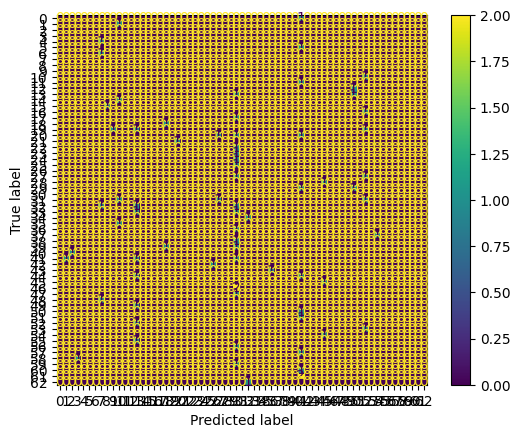

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)

log_model_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy Score: ", accuracy_score(y_test, log_model_pred))
cm = confusion_matrix(y_test, log_model_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

**Problem Statement**

Predict whether a loan applicant is likely to default on a loan.

**Dataset Understanding and Description**

This dataset is of loans, it has 12 columns in total.

**Data Cleaning and Preparation**

The dataset was not complete and prepared, i completed it by filling the median values of the a columns in that columns empty cells to have it prepared.

**Summarizing the key insights**

1. This Porject prodicts the Loan Amount on the basis of 80% data which is fed to it.
2. It's Accuracy is 0.027027
3. Through charts it shows:
  * The first histogram shows that Male has taken more loans than Women.
  * As per Countplot, Number of Graduates are so more than Number of Ungraduates.
  * Lastly lineplot shows, Graduates has more incomes than Ungraduates.
